## Lending Club Case Study

**Title:** Lending Club Case Study

**Authors:** Jithin J, Senthilkumar L

Objective : Driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import re
import datetime
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#loading the dataset
loan_df = pd.read_csv('loan.csv')

In [3]:
#printing the first 5 rows of the dataframe
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [4]:
#knowing the shape of the dataframe
loan_df.shape

(39717, 111)

In [5]:
#displaying the columns of the dataframe
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [6]:
def nullPer(df):
    nullclm = df.isnull().sum()
    return 100*nullclm[df.isnull().sum() > 0]/df.shape[0]

In [7]:
def nullClmns(df, p=0.3):
    #dfc = df.copy()
    null_val = df.isnull().sum()
    return null_val[null_val >=p*len(df)]

In [8]:
def uniqueValFilter(df, n):
    clmn = df.nunique()
    return clmn[clmn<=n].index

In [9]:
def pltDistBar(df, clmn, title):
    plt.figure(figsize = (13,5))
    plt.subplot(1,2,1)
    sns.distplot(df[clmn], color = 'midnightblue')
    plt.title(title)
    plt.subplot(1,2,2)
    sns.boxplot(data =df, x=clmn,orient='h')
    plt.title(title)

In [10]:
def catCompare(df, clm1, clm2):
    u1 = df[clm1].unique()
    u2 = df[clm2].unique()
    filt1 = []
    for i in range(len(u1)):
        filt1.append(df[clm1]==u1[i])
    filt2 = []
    for i in range(len(u2)):
        filt2.append(df[clm2]==u2[i])
    cat = [] 
    plt.figure(figsize = (13,5))

    for k in range(len(u1)):

        cat.append(100*df[filt1[k]][clm2].value_counts()/len(df[filt1[k]][clm2]))


    for i in range(1, len(cat)+1):
        plt.subplot(1, len(cat), i)
        cat[i-1].plot.bar()
        plt.title(u1[i-1])
    return cat

In [11]:
def perOfTarget(df, clmn, target):
    crstb = pd.crosstab(df[clmn], df[target],margins=True)
    perOfDefl = round((crstb['Charged Off']/crstb['All']),3)
    perOfDefl[~(perOfDefl.index=='All')].plot.bar()
    plt.ylabel('Default %')
    perOfDefl.sort_values(ascending=False)
    return perOfDefl.sort_values(ascending=False)

#### Null percentage

In [12]:
#displaying the percentage of null values in our dataframe
nullPer(loan_df)

emp_title                           6.191303
emp_length                          2.706650
desc                               32.580507
title                               0.027696
mths_since_last_delinq             64.662487
mths_since_last_record             92.985372
revol_util                          0.125891
last_pymnt_d                        0.178765
next_pymnt_d                       97.129693
last_credit_pull_d                  0.005036
collections_12_mths_ex_med          0.140998
mths_since_last_major_derog       100.000000
annual_inc_joint                  100.000000
dti_joint                         100.000000
verification_status_joint         100.000000
tot_coll_amt                      100.000000
tot_cur_bal                       100.000000
open_acc_6m                       100.000000
open_il_6m                        100.000000
open_il_12m                       100.000000
open_il_24m                       100.000000
mths_since_rcnt_il                100.000000
total_bal_

#### Remove columns with no entries 

In [13]:
all_nulls = nullClmns(loan_df, p=1)
all_nulls.index

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [14]:
loan_df[all_nulls.index]

mths_since_last_major_derog  annual_inc_joint  dti_joint  \
0                              NaN               NaN        NaN   
1                              NaN               NaN        NaN   
2                              NaN               NaN        NaN   
3                              NaN               NaN        NaN   
4                              NaN               NaN        NaN   
5                              NaN               NaN        NaN   
6                              NaN               NaN        NaN   
7                              NaN               NaN        NaN   
8                              NaN               NaN        NaN   
9                              NaN               NaN        NaN   
10                             NaN               NaN        NaN   
11                             NaN               NaN        NaN   
12                             NaN               NaN        NaN   
13                             NaN               NaN        NaN   
14                             NaN               NaN        NaN   
15                             NaN               NaN        NaN   
16                             NaN               NaN        NaN   
17                             NaN               NaN        NaN   
18                             NaN               NaN        NaN   
19                             NaN               NaN        NaN   
20                             NaN               NaN        NaN   
21                             NaN               NaN        NaN   
22                             NaN               NaN        NaN   
23                             NaN               NaN        NaN   
24                             NaN               NaN        NaN   
25                             NaN               NaN        NaN   
26                             NaN               NaN        NaN   
27                             NaN               NaN        NaN   
28                             NaN               NaN        NaN   
29                             NaN               NaN        NaN   
...                            ...               ...        ...   
39687                          NaN               NaN        NaN   
39688                          NaN               NaN        NaN   
39689                          NaN               NaN        NaN   
39690                          NaN               NaN        NaN   
39691                          NaN               NaN        NaN   
39692                          NaN               NaN        NaN   
39693                          NaN               NaN        NaN   
39694                          NaN               NaN        NaN   
39695                          NaN               NaN        NaN   
39696                          NaN               NaN        NaN   
39697                          NaN               NaN        NaN   
39698                          NaN               NaN        NaN   
39699                          NaN               NaN        NaN   
39700                          NaN               NaN        NaN   
39701                          NaN               NaN        NaN   
39702                          NaN               NaN        NaN   
39703                          NaN               NaN        NaN   
39704                          NaN               NaN        NaN   
39705                          NaN               NaN        NaN   
39706                          NaN               NaN        NaN   
39707                          NaN               NaN        NaN   
39708                          NaN               NaN        NaN   
39709                          NaN               NaN        NaN   
39710                          NaN               NaN        NaN   
39711                          NaN               NaN        NaN   
39712                          NaN               NaN        NaN   
39713                          NaN               NaN        NaN   
39714                          NaN               NaN  

In [15]:
loan_df.drop(all_nulls.index,axis=1, inplace=True)

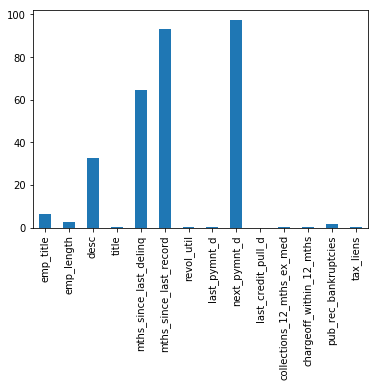

In [16]:
nullPer(loan_df).plot.bar()
plt.show()

#### Remove colmns with only less than 30% of data

In [17]:
null_val = nullClmns(loan_df, p=0.3)
null_val.index

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d'],
      dtype='object')

In [18]:
loan_df.drop(null_val.index,axis=1, inplace=True)
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [19]:
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0   10.65%       162.87     B        B2  ...          171.62   
1   15.27%        59.83     C        C4  ...          119.66   
2   15.96%        84.33     C        C5  ...          649.91   
3   13.49%       339.31     C        C1  ...          357.48   
4   12.69%        67.79     B        B5  ...           67.79   

  last_credit_pull_d collections_12_mths_ex_med  policy_code application_type  \
0             May-16                        0.0            1       INDIVIDUAL   
1             Sep-13                        0.0            1       INDIVIDUAL   
2             May-16                        0.0            1       INDIVIDUAL   
3             Apr-16                        0.0            1       INDIVIDUAL   
4             May-16                        0.0            1       INDIVIDUAL   

  acc_now_delinq chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies  \
0              0                      0.0           0                  0.0   
1              0                      0.0           0                  0.0   
2              0                      0.0           0                  0.0   
3              0                      0.0           0                  0.0   
4              0                      0.0           0                  0.0   

  tax_liens  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  

[5 rows x 53 columns]

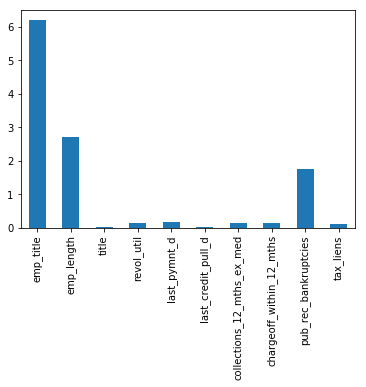

In [20]:
nullPer(loan_df).plot.bar()
plt.show()

#### Remove columns with only one unique value

In [21]:
loan_df['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [22]:
loan_df['initial_list_status'].unique()

array(['f'], dtype=object)

In [23]:
uClmn = uniqueValFilter(loan_df, 1)

In [24]:
loan_df[uClmn].nunique()

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

In [25]:
loan_df.drop(uClmn,axis=1, inplace=True)

In [26]:
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... total_pymnt_inv total_rec_prncp  \
0   10.65%       162.87     B        B2  ...         5833.84         5000.00   
1   15.27%        59.83     C        C4  ...         1008.71          456.46   
2   15.96%        84.33     C        C5  ...         3005.67         2400.00   
3   13.49%       339.31     C        C1  ...        12231.89        10000.00   
4   12.69%        67.79     B        B5  ...         3513.33         2475.94   

  total_rec_int  total_rec_late_fee recoveries collection_recovery_fee  \
0        863.16                0.00       0.00                    0.00   
1        435.17                0.00     117.08                    1.11   
2        605.67                0.00       0.00                    0.00   
3       2214.92               16.97       0.00                    0.00   
4       1037.39                0.00       0.00                    0.00   

  last_pymnt_d last_pymnt_amnt last_credit_pull_d pub_rec_bankruptcies  
0       Jan-15          171.62             May-16                  0.0  
1       Apr-13          119.66             Sep-13                  0.0  
2       Jun-14          649.91             May-16                  0.0  
3       Jan-15          357.48             Apr-16                  0.0  
4       May-16           67.79             May-16                  0.0  

[5 rows x 44 columns]

In [27]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

#### Fix the numeric columns

In [28]:
loan_df.head(1)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   

  int_rate  installment grade sub_grade  ... total_pymnt_inv total_rec_prncp  \
0   10.65%       162.87     B        B2  ...         5833.84          5000.0   

  total_rec_int  total_rec_late_fee recoveries collection_recovery_fee  \
0        863.16                 0.0        0.0                     0.0   

  last_pymnt_d last_pymnt_amnt last_credit_pull_d pub_rec_bankruptcies  
0       Jan-15          171.62             May-16                  0.0  

[1 rows x 44 columns]

In [29]:
numClmns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv','installment', 'annual_inc', 'dti', 'revol_bal','total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int',\
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',\
       ]
loan_df[numClmns]

loan_amnt  funded_amnt  funded_amnt_inv  installment  annual_inc  \
0           5000         5000       4975.00000       162.87    24000.00   
1           2500         2500       2500.00000        59.83    30000.00   
2           2400         2400       2400.00000        84.33    12252.00   
3          10000        10000      10000.00000       339.31    49200.00   
4           3000         3000       3000.00000        67.79    80000.00   
5           5000         5000       5000.00000       156.46    36000.00   
6           7000         7000       7000.00000       170.08    47004.00   
7           3000         3000       3000.00000       109.43    48000.00   
8           5600         5600       5600.00000       152.39    40000.00   
9           5375         5375       5350.00000       121.45    15000.00   
10          6500         6500       6500.00000       153.45    72000.00   
11         12000        12000      12000.00000       402.54    75000.00   
12          9000         9000       9000.00000       305.38    30000.00   
13          3000         3000       3000.00000        96.68    15000.00   
14         10000        10000      10000.00000       325.74   100000.00   
15          1000         1000       1000.00000        35.31    28000.00   
16         10000        10000      10000.00000       347.98    42000.00   
17          3600         3600       3600.00000       109.57   110000.00   
18          6000         6000       6000.00000       198.46    84000.00   
19          9200         9200       9200.00000       280.01    77385.19   
20         20250        20250      19142.16108       484.63    43370.00   
21         21000        21000      21000.00000       701.73   105000.00   
22         10000        10000      10000.00000       330.76    50000.00   
23         10000        10000      10000.00000       330.76    50000.00   
24          6000         6000       6000.00000       198.46    76000.00   
25         15000        15000      15000.00000       483.38    92000.00   
26         15000        15000       8725.00000       514.64    60000.00   
27          5000         5000       5000.00000       123.65    50004.00   
28          4000         4000       4000.00000       132.31   106000.00   
29          8500         8500       8500.00000       281.15    25000.00   
...          ...          ...              ...          ...         ...   
39687      12000        12000       2500.00000       401.37    75000.00   
39688      20000        20000       2800.00000       678.08   145000.00   
39689       1200         1200          0.00000        39.60    20000.00   
39690      12250        12250       1525.00000       398.69    60000.00   
39691       2700         2700        550.00000        94.88    52200.00   
39692       5000         5000       1775.00000       159.03   250000.00   
39693       3500         3500       1200.00000       112.87    13500.00   
39694       5000         5000       4150.00000       155.38   150000.00   
39695       5000         5000       3100.00000       155.38    95000.00   
39696      25000        25000        525.00000       813.65    48000.00   
39697      10000        10000        400.00000       323.98    27376.00   
39698       5000         5000        675.00000       159.03    73000.00   
39699       5100         5100        575.00000       160.72    32000.00   
39700       5400         5400        200.00000       168.60     8000.00   
39701       5300         5300        600.00000       167.02    74000.00   
39702       5000         5000        850.00000       164.23    30000.00   
39703       3000         3000       2550.00000        97.20   200000.00   
39704       3000         3000        950.00000        94.98    25000.00   
39705       5000         5000        250.00000       155.38   120000.00   
39706       5000         5000        150.00000       156.84   180000.00   
39707       5000         5000        525.00000       159.77   180000.00   
39708       5000         5000   

In [30]:
loan_df[numClmns] = loan_df[numClmns].apply(pd.to_numeric)

In [31]:
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... total_pymnt_inv total_rec_prncp  \
0   10.65%       162.87     B        B2  ...         5833.84         5000.00   
1   15.27%        59.83     C        C4  ...         1008.71          456.46   
2   15.96%        84.33     C        C5  ...         3005.67         2400.00   
3   13.49%       339.31     C        C1  ...        12231.89        10000.00   
4   12.69%        67.79     B        B5  ...         3513.33         2475.94   

  total_rec_int  total_rec_late_fee recoveries collection_recovery_fee  \
0        863.16                0.00       0.00                    0.00   
1        435.17                0.00     117.08                    1.11   
2        605.67                0.00       0.00                    0.00   
3       2214.92               16.97       0.00                    0.00   
4       1037.39                0.00       0.00                    0.00   

  last_pymnt_d last_pymnt_amnt last_credit_pull_d pub_rec_bankruptcies  
0       Jan-15          171.62             May-16                  0.0  
1       Apr-13          119.66             Sep-13                  0.0  
2       Jun-14          649.91             May-16                  0.0  
3       Jan-15          357.48             Apr-16                  0.0  
4       May-16           67.79             May-16                  0.0  

[5 rows x 44 columns]

In [32]:
#displaying the name of the 44 columns in the dataframe
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [33]:
#dropping few of the columns which will not be used for our analysis
loan_df.drop(['id', 'member_id', 'emp_title', 'url','zip_code', 'title'], axis = 1, inplace = True)

In [34]:
#displaying the top 5 rows of the dataframe
loan_df.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0       5000         5000           4975.0   36 months   10.65%       162.87   
1       2500         2500           2500.0   60 months   15.27%        59.83   
2       2400         2400           2400.0   36 months   15.96%        84.33   
3      10000        10000          10000.0   36 months   13.49%       339.31   
4       3000         3000           3000.0   60 months   12.69%        67.79   

  grade sub_grade emp_length home_ownership  ...  total_pymnt_inv  \
0     B        B2  10+ years           RENT  ...          5833.84   
1     C        C4   < 1 year           RENT  ...          1008.71   
2     C        C5  10+ years           RENT  ...          3005.67   
3     C        C1  10+ years           RENT  ...         12231.89   
4     B        B5     1 year           RENT  ...          3513.33   

  total_rec_prncp total_rec_int total_rec_late_fee recoveries  \
0         5000.00        863.16               0.00       0.00   
1          456.46        435.17               0.00     117.08   
2         2400.00        605.67               0.00       0.00   
3        10000.00       2214.92              16.97       0.00   
4         2475.94       1037.39               0.00       0.00   

  collection_recovery_fee  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0                    0.00        Jan-15           171.62             May-16   
1                    1.11        Apr-13           119.66             Sep-13   
2                    0.00        Jun-14           649.91             May-16   
3                    0.00        Jan-15           357.48             Apr-16   
4                    0.00        May-16            67.79             May-16   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 38 columns]

We now have 38 columns for our further analysis

In [35]:
#doing an info to know the datatypes of the columns in our dataframe
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 38 columns):
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null object
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null object
loan_status                39717 non-null object
purpose                    39717 non-null object
addr_state                 39717 non-null object
dti                        39717 non-null float64
delinq_2yrs                39717 non-null int64
earliest

We can see that the interest rate and revol util is of the type object, converting the same to type float

In [36]:
#replacing the % symbol in int_rate and revol_util column
loan_df['int_rate'] = loan_df['int_rate'].str.replace('%', '')
loan_df['revol_util'] = loan_df['revol_util'].str.replace('%', '')

In [37]:
#converting the int_rate column to float type
loan_df['int_rate'] = loan_df['int_rate'].astype(float)
loan_df['revol_util'] = loan_df['revol_util'].astype(float)

In [38]:
print(loan_df['int_rate'].dtype)
print(loan_df['revol_util'].dtype)

float64
float64


The int_rate and revol_util column is now of the type float

In [39]:
#let us the rename the columns of the dataset so that the identification becomes easy
loan_df = loan_df.rename(columns = {'loan_amnt' : 'loan_amount', 'funded_amnt': 'funded_amount', 'funded_amnt_inv' : 'investor_funds', 'int_rate' : 'interest_rate', 'annual_inc' : 'annual_income'})

### Univariate & Bivariate Analysis

**loan_amount, funded_amount, investor_funds**

We will first analyze the first 3 columns of the dataset i.e, the loan_amount, funded_amount, investor_funds.

1. loan_amount - The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2. funded_amount - The total amount committed to that loan at that point in time.
3. investor_funds - The total amount committed by investors for that loan at that point in time.

In [40]:
loan_df.head()

loan_amount  funded_amount  investor_funds        term  interest_rate  \
0         5000           5000          4975.0   36 months          10.65   
1         2500           2500          2500.0   60 months          15.27   
2         2400           2400          2400.0   36 months          15.96   
3        10000          10000         10000.0   36 months          13.49   
4         3000           3000          3000.0   60 months          12.69   

   installment grade sub_grade emp_length home_ownership  ...  \
0       162.87     B        B2  10+ years           RENT  ...   
1        59.83     C        C4   < 1 year           RENT  ...   
2        84.33     C        C5  10+ years           RENT  ...   
3       339.31     C        C1  10+ years           RENT  ...   
4        67.79     B        B5     1 year           RENT  ...   

   total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee  \
0          5833.84         5000.00        863.16               0.00   
1          1008.71          456.46        435.17               0.00   
2          3005.67         2400.00        605.67               0.00   
3         12231.89        10000.00       2214.92              16.97   
4          3513.33         2475.94       1037.39               0.00   

  recoveries collection_recovery_fee  last_pymnt_d  last_pymnt_amnt  \
0       0.00                    0.00        Jan-15           171.62   
1     117.08                    1.11        Apr-13           119.66   
2       0.00                    0.00        Jun-14           649.91   
3       0.00                    0.00        Jan-15           357.48   
4       0.00                    0.00        May-16            67.79   

  last_credit_pull_d  pub_rec_bankruptcies  
0             May-16                   0.0  
1             Sep-13                   0.0  
2             May-16                   0.0  
3             Apr-16                   0.0  
4             May-16                   0.0  

[5 rows x 38 columns]

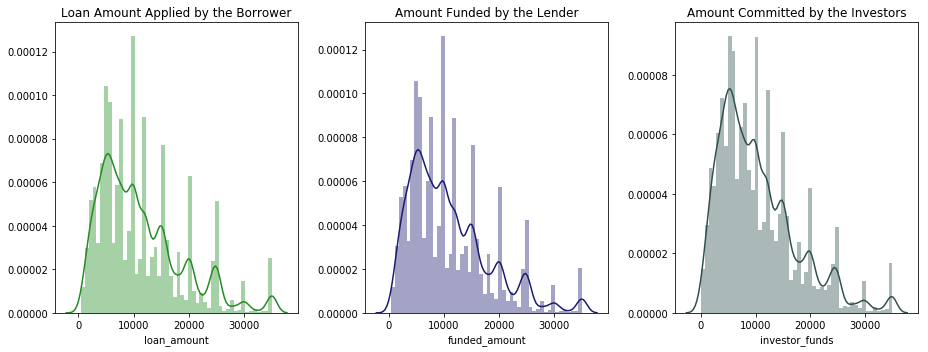

In [41]:
plt.figure(figsize = (13,5))
#Distribution of the loan amount applied by the borrower
plt.subplot(1,3,1)
sns.distplot(loan_df['loan_amount'], color = 'forestgreen')
plt.title("Loan Amount Applied by the Borrower")

#Distribution of the loan amount lended by the lender
plt.subplot(1,3,2)
sns.distplot(loan_df['funded_amount'], color = 'midnightblue')
plt.title("Amount Funded by the Lender")

#Distribution of the amount committed by the investors
plt.subplot(1,3,3)
sns.distplot(loan_df['investor_funds'], color = 'darkslategray')
plt.title("Amount Committed by the Investors")
plt.tight_layout()

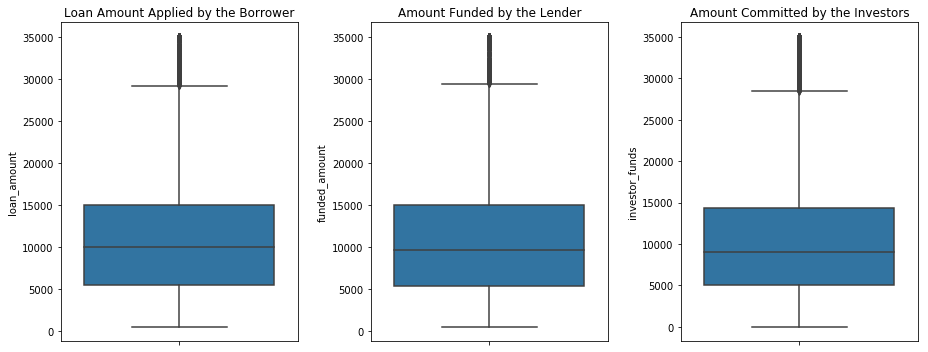

In [42]:
plt.figure(figsize = (13,5))
plt.subplot(1,3,1)
sns.boxplot(data =loan_df, x='loan_amount',orient='v')
plt.title("Loan Amount Applied by the Borrower")
plt.subplot(1,3,2)
sns.boxplot(data =loan_df, x='funded_amount',orient='v')
plt.title("Amount Funded by the Lender")
plt.subplot(1,3,3)
sns.boxplot(data =loan_df, x='investor_funds',orient='v')
plt.title("Amount Committed by the Investors")
plt.tight_layout()

In [43]:
loan_df['loan_amount'].describe(percentiles=[0.20,0.25,0.5,0.75,0.85])

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
20%       5000.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
85%      20000.000000
max      35000.000000
Name: loan_amount, dtype: float64

In [44]:
loan_df['funded_amount'].describe(percentiles=[0.20,0.25,0.5,0.75,0.85, 0.86])

count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
20%       5000.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
85%      18750.000000
86%      20000.000000
max      35000.000000
Name: funded_amount, dtype: float64

In [45]:
loan_df['investor_funds'].describe(percentiles=[0.25,0.5,0.75,0.85, 0.9])

count    39717.000000
mean     10397.448868
std       7128.450439
min          0.000000
25%       5000.000000
50%       8975.000000
75%      14400.000000
85%      17950.000000
90%      20000.000000
max      35000.000000
Name: investor_funds, dtype: float64

We can observe the following from the above plots:
1. Most of the loan amount applied was in the range of 5000 to 20000
2. The amount applied, amount lended and amount invested by investors also has a similar distribution

**month and year**

In [46]:
#let us now see the year where the maximum number of loans were issued
loan_df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [47]:
#converting the issue_d column to the datetime type
loan_df['issue_d'] = loan_df['issue_d'].str.replace('-',' ')
loan_df['issue_d'].head()

0    Dec 11
1    Dec 11
2    Dec 11
3    Dec 11
4    Dec 11
Name: issue_d, dtype: object

In [48]:
loan_df['year'] = loan_df['issue_d'].apply(lambda x:'20'+x.split(' ')[1])

In [49]:
#extracting the month from the issue date
month = []
for i in loan_df['issue_d']:
    month.append(datetime.datetime.strptime(i, "%b %d"))

In [50]:
loan_df['month'] = pd.DataFrame(month)
loan_df['month'] = pd.to_datetime(loan_df['month'])
loan_df['month'] = loan_df['month'].dt.month

In [51]:
loan_df['month'].unique()

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1], dtype=int64)

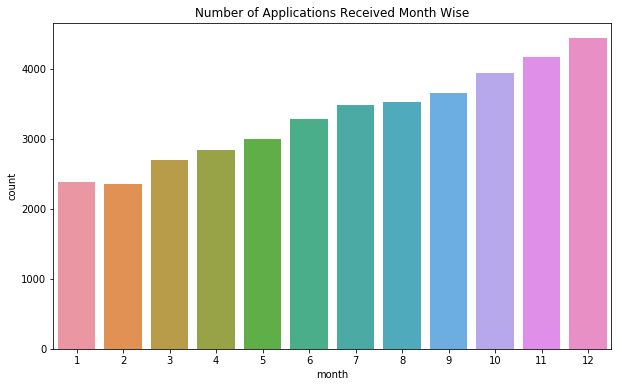

In [52]:
#doing a count on the months to see which month received the highest loan applications
plt.figure(figsize=(10,6))
sns.countplot(loan_df['month'])
plt.title("Number of Applications Received Month Wise")
plt.show()

From the above we can see that, maximum number of loan applications were recived in the month of december

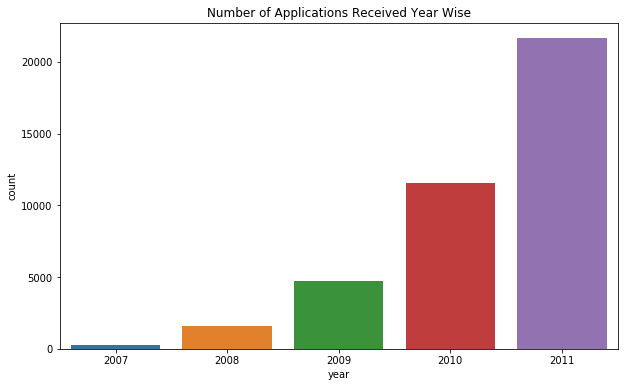

In [53]:
#(loan_df.groupby(by= [loan_df.year])[['loan_status']].count()).plot(kind='bar')
plt.figure(figsize=(10,6))
sns.countplot(loan_df['year'])
plt.title("Number of Applications Received Year Wise")
plt.show()

**loan_status**

In [54]:
#checking for the different status of the loans
loan_stat_perc = round(loan_df['loan_status'].value_counts() / loan_df.shape[0], 2) *100
loan_stat = loan_df['loan_status'].unique()
loan_stat = list(loan_stat)
loan_stat_perc = list(loan_stat_perc)

In [55]:
fig = go.Figure(data = [go.Bar(x = loan_stat, y = loan_stat_perc, textposition = 'auto', marker_color='indianred')])
fig.show()

From the above we can see that 14% of the loans are defaulted and 83% of the loans were fully paid.

In [56]:
loan_df.columns

Index(['loan_amount', 'funded_amount', 'investor_funds', 'term',
       'interest_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_income', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'year', 'month'],
      dtype='object')

**Interest Rate**

In [57]:
loan_df['interest_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
5         7.90
6        15.96
7        18.64
8        21.28
9        12.69
10       14.65
11       12.69
12       13.49
13        9.91
14       10.65
15       16.29
16       15.27
17        6.03
18       11.71
19        6.03
20       15.27
21       12.42
22       11.71
23       11.71
24       11.71
25        9.91
26       14.27
27       16.77
28       11.71
29       11.71
         ...  
39687    12.49
39688    13.43
39689    11.54
39690    10.59
39691    15.96
39692     9.01
39693     9.96
39694     7.43
39695     7.43
39696    10.59
39697    10.28
39698     9.01
39699     8.38
39700     7.75
39701     8.38
39702    11.22
39703    10.28
39704     8.70
39705     7.43
39706     8.07
39707     9.33
39708     9.96
39709    11.22
39710     7.43
39711     8.70
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: interest_rate, Length: 39717, dtype: float64

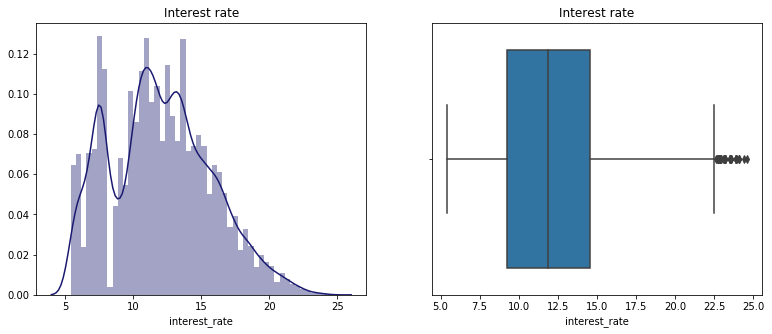

In [58]:
pltDistBar(loan_df, 'interest_rate', 'Interest rate')

In [59]:
loan_df['interest_rate'].describe(percentiles=[0.25,0.5,0.75,0.85])

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
85%         16.000000
max         24.590000
Name: interest_rate, dtype: float64

Most of the interest rate was in the range of 9% to 16% 

In [60]:
loan_df['interest_rate'].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: interest_rate, dtype: float64

Average interest rate is 12.01% , so we will consider anything above this high interest rate

In [61]:
loan_df['interest_payment'] = np.nan
lst = [loan_df]
for value in lst:
    value.loc[value['interest_rate'] <= 12.01, 'interest_payment'] = 'low'
    value.loc[value['interest_rate'] > 12.01, 'interest_payment'] = 'high'           

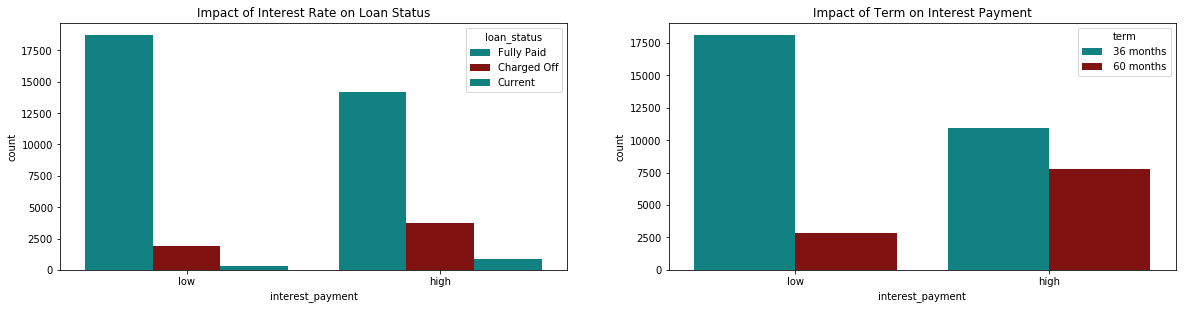

In [62]:
plt.figure(figsize=(20,10))
palette = ['#009393', '#930000']
plt.subplot(221)
ax = sns.countplot(x='interest_payment', data=loan_df, palette=palette, hue='loan_status')
plt.title('Impact of Interest Rate on Loan Status')

plt.subplot(222)
ax1 = sns.countplot(x='interest_payment', data=loan_df, palette=palette, hue='term')
plt.title('Impact of Term on Interest Payment')
plt.show()

From the above plot we can observe that we have a higher rate of loans being charged off when the interest rate is high also when the term is 60 months.

**annual_inc**

In [63]:
loan_df['annual_income'].describe(percentiles=[0.25,0.5,0.75,0.85, 0.99])

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
85%      1.000000e+05
99%      2.349994e+05
max      6.000000e+06
Name: annual_income, dtype: float64

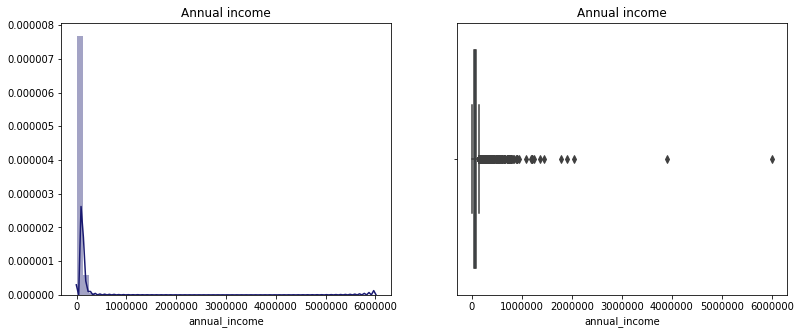

In [64]:
pltDistBar(loan_df, 'annual_income', 'Annual income')

Lets remove the outlier

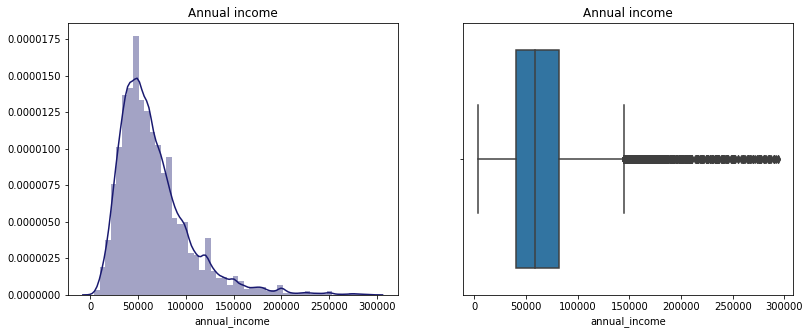

In [65]:
th = loan_df["annual_income"].quantile(0.995)
loan_df = loan_df[loan_df['annual_income']<th]
pltDistBar(loan_df, 'annual_income', 'Annual income')

In [66]:
loan_df['annual_income'].describe(percentiles=[0.25,0.5,0.75,0.85, 0.99])

count     39494.000000
mean      66378.257586
std       37413.212327
min        4000.000000
25%       40000.000000
50%       58776.000000
75%       81996.000000
85%      100000.000000
99%      200000.000000
max      294000.000000
Name: annual_income, dtype: float64

Anual income mostly lies in the range of 40000 to 82000

In [67]:
#loan_df['loan_amount']/loan_df['annual_income']

In [68]:
loan_df.columns

Index(['loan_amount', 'funded_amount', 'investor_funds', 'term',
       'interest_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_income', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'year', 'month', 'interest_payment'],
      dtype='object')

**home ownership**

In [69]:
loan_df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

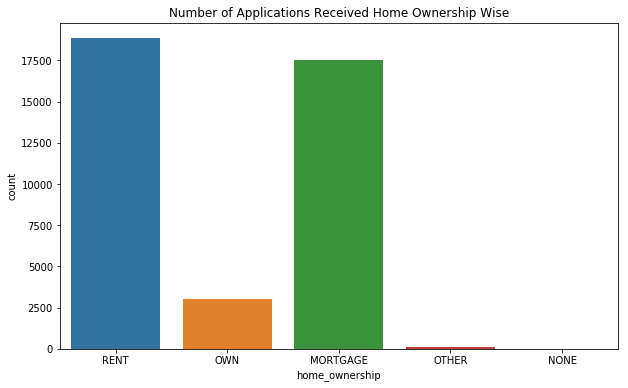

In [70]:
plt.figure(figsize=(10,6))
ax = sns.countplot(loan_df['home_ownership'])
plt.title("Number of Applications Received Home Ownership Wise")
plt.show()

The maximum number of applications were received where the house was rented

In [71]:
(100*loan_df['home_ownership'].value_counts()/len(loan_df['home_ownership']))

RENT        47.723705
MORTGAGE    44.325720
OWN          7.697372
OTHER        0.245607
NONE         0.007596
Name: home_ownership, dtype: float64

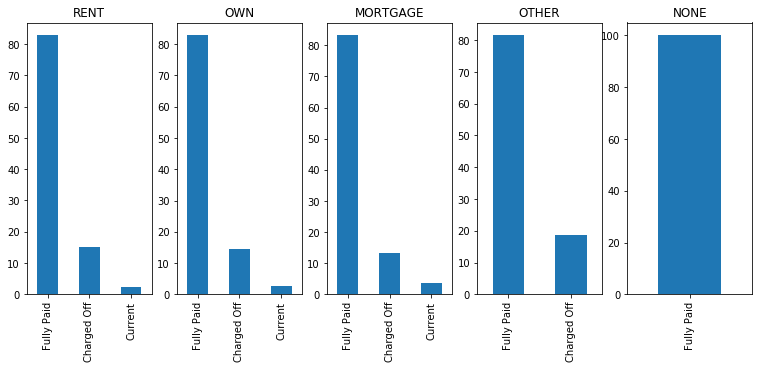

In [72]:
cat = catCompare(loan_df, 'home_ownership', 'loan_status')

Most of the charged off loans are where the house is rented

In [73]:
cat[0]#RENT

Fully Paid     82.762097
Charged Off    15.020161
Current         2.217742
Name: loan_status, dtype: float64

In [74]:
cat[1]#OWN

Fully Paid     82.796053
Charged Off    14.473684
Current         2.730263
Name: loan_status, dtype: float64

In [75]:
cat[2]#MORTAGE

Fully Paid     83.160059
Charged Off    13.218325
Current         3.621615
Name: loan_status, dtype: float64

**Term**

In [76]:
loan_df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

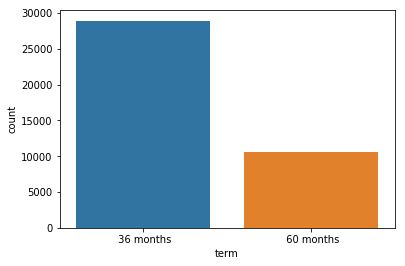

In [77]:
sns.countplot(loan_df['term'])
plt.show();

Most of the loans in our dataset have a term of 36 Months

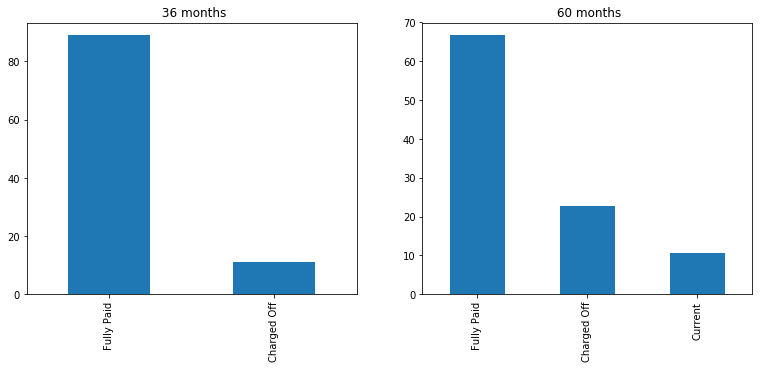

In [78]:
cat = catCompare(loan_df, 'term', 'loan_status')

Most of the charged off loans are for the term of 60 months

In [79]:
cat[0]

Fully Paid     88.897719
Charged Off    11.102281
Name: loan_status, dtype: float64

In [80]:
cat[1]

Fully Paid     66.600341
Charged Off    22.645442
Current        10.754216
Name: loan_status, dtype: float64

**Purpose**

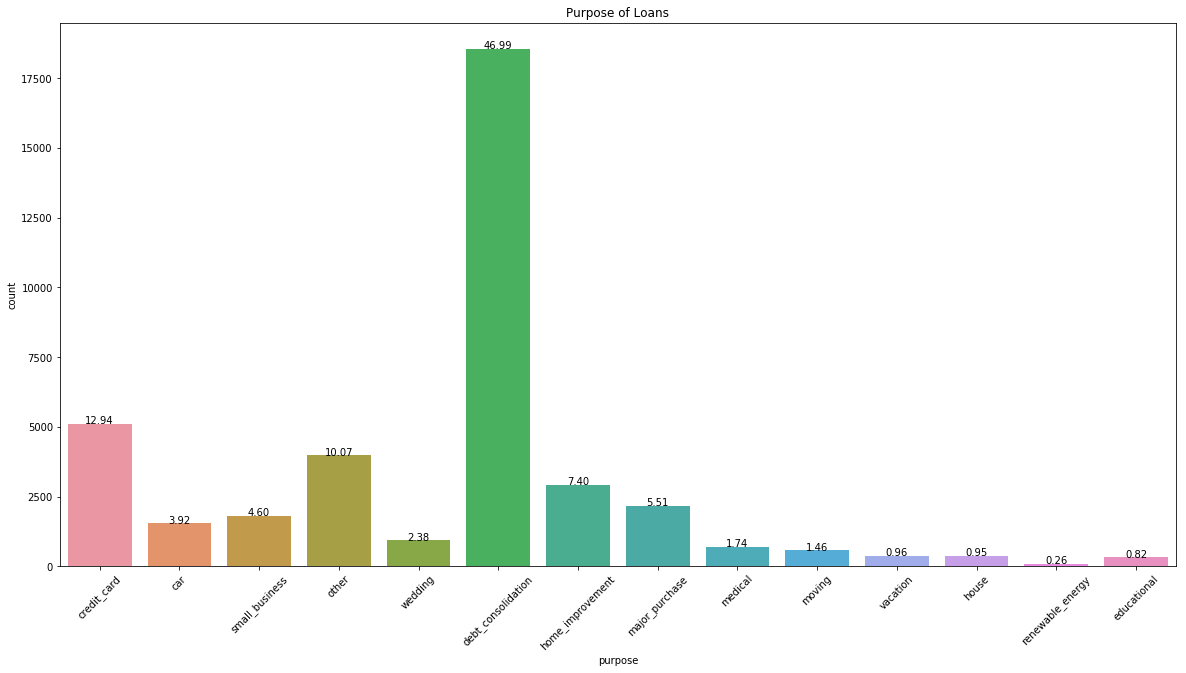

In [81]:
#Let us now the see the purpose for which the loan was taken
plt.figure(figsize=(20,10))
total = len(loan_df)
ax = sns.countplot(x='purpose', data = loan_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height + 3,'{:1.2f}'.format(height/total * 100),ha="center")

ax.set_title("Purpose of Loans")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
plt.show()

We can see from the above the loan was majorly taken for debt consolidation followed by credit card and home improvement

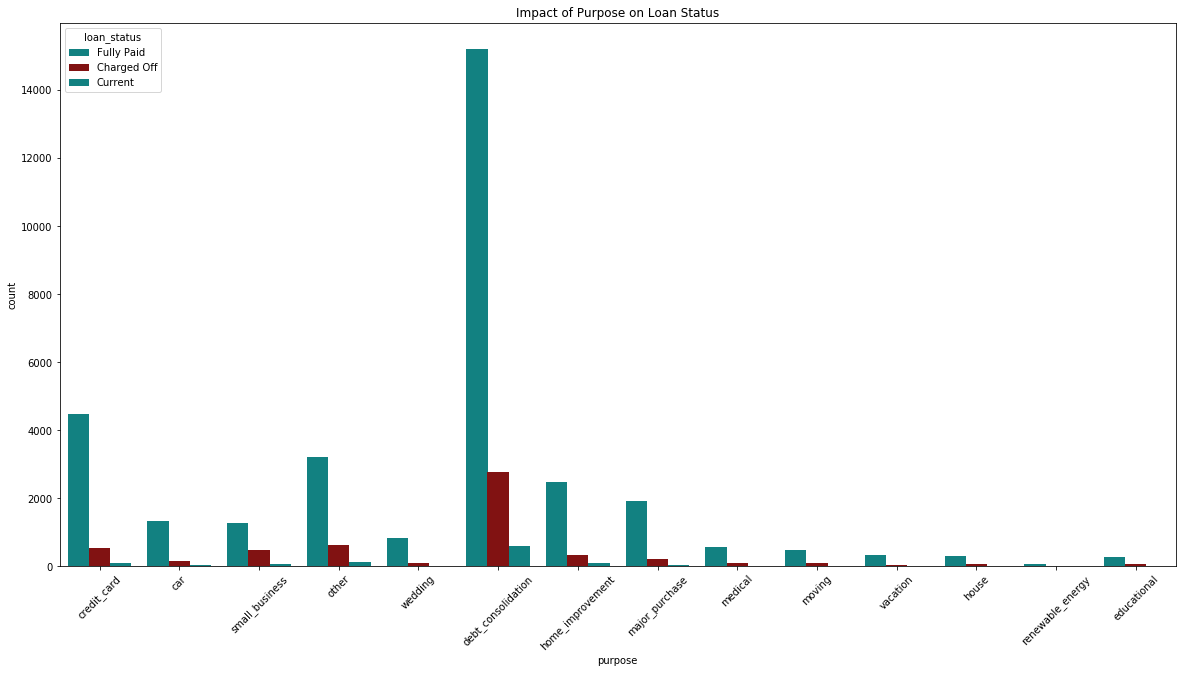

In [82]:
plt.figure(figsize=(20,10))
palette = ['#009393', '#930000']
ax = sns.countplot(x='purpose', data=loan_df, palette=palette, hue='loan_status')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
plt.title('Impact of Purpose on Loan Status')
plt.show()

We can see that highest number of charged off loans were the ones taken for the purpose of debt consolidation.

**Verification Status**

In [83]:
#checking for the unique values in verification status
loan_df['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [84]:
(100*loan_df['verification_status'].value_counts()/len(loan_df['verification_status']))

Not Verified       42.690029
Verified           32.207424
Source Verified    25.102547
Name: verification_status, dtype: float64

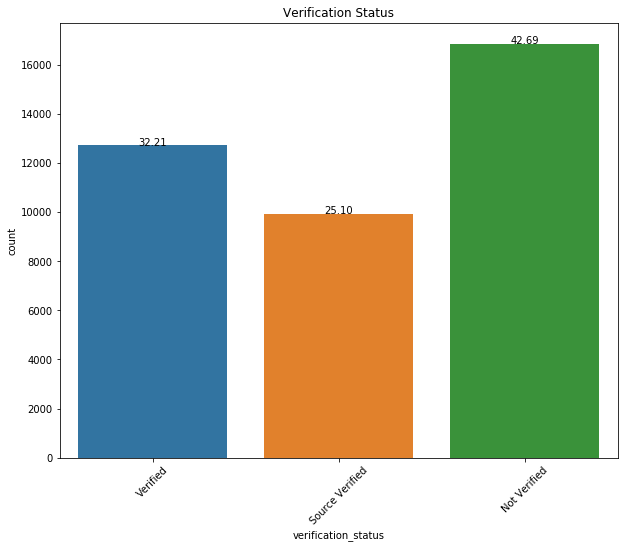

In [85]:
plt.figure(figsize=(10,8))
total = len(loan_df)
ax = sns.countplot(x='verification_status', data = loan_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height + 3,'{:1.2f}'.format(height/total * 100),ha="center")

ax.set_title("Verification Status")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
plt.show()

From the above plot we can see that almost 43% of the loans does not have their income verified.

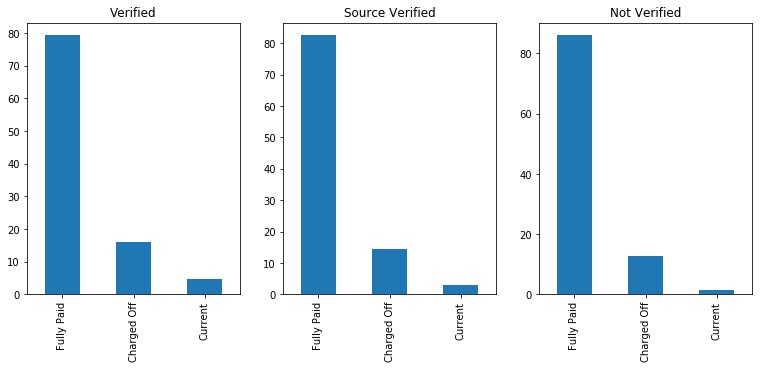

In [86]:
cat = catCompare(loan_df, 'verification_status', 'loan_status')

In [87]:
cat[0] #verified

Fully Paid     79.237421
Charged Off    16.053459
Current         4.709119
Name: loan_status, dtype: float64

In [88]:
cat[1] #source verified

Fully Paid     82.499496
Charged Off    14.383700
Current         3.116805
Name: loan_status, dtype: float64

In [89]:
cat[2] #not verified

Fully Paid     85.990510
Charged Off    12.663108
Current         1.346382
Name: loan_status, dtype: float64

From the above distributions and info we can find that most of the charged off loans were in the area where the income was verified

**Installment**

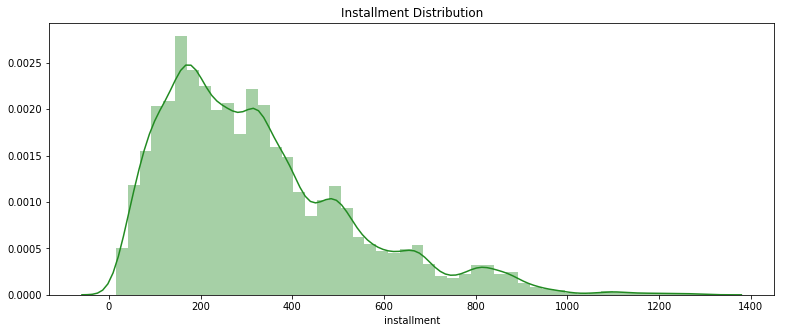

In [90]:
plt.figure(figsize = (13,5))
#Distribution of the installment
sns.distplot(loan_df['installment'], color = 'forestgreen')
plt.title("Installment Distribution")
plt.show()

Most of the installment amount is around 200.

## Default percentage

In [91]:
loan_df['interest_rate'].describe()
ranges = [0, 8, 13, 15, 19,24.4]
labels = ['0-8', '8-13', '13-15', '15-19', '19>=']
loan_df['interest_rate_ranges'] = pd.cut(loan_df['interest_rate'], ranges, labels=labels)

interest_rate_ranges
19>=     0.320
8-13     0.240
13-15    0.166
All      0.142
15-19    0.098
0-8      0.064
dtype: float64

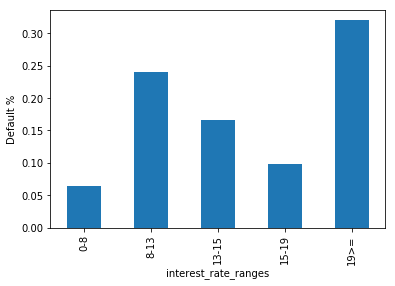

In [92]:
perOfTarget(loan_df, 'interest_rate_ranges', 'loan_status')

From the figure, it is clear that as interest rate increases so as default percentage

In [93]:
loan_df['dti'].describe()
ranges = [0, 5, 10, 15, 20,29.99]
labels = ['0-5', '5-10', '10-15', '15-20', '20>=']
loan_df['dti_ranges'] = pd.cut(loan_df['dti'], ranges, labels=labels)

dti_ranges
20>=     0.247
10-15    0.187
15-20    0.153
All      0.142
5-10     0.101
0-5      0.073
dtype: float64

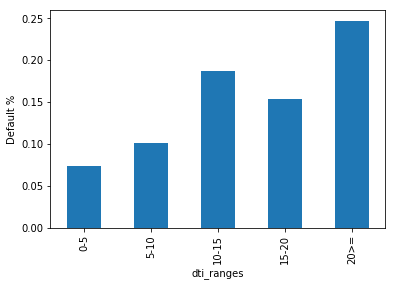

In [94]:
perOfTarget(loan_df, 'dti_ranges', 'loan_status')

From the figure, it is clear that as dti range increases so as default percentage

In [95]:
loan_df['annual_income'].describe()
ranges = [0, 25000, 50000, 75000, 100000,1000000]
labels = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000>=']
loan_df['annual_income_ranges'] = pd.cut(loan_df['annual_income'], ranges, labels=labels)

annual_income_ranges
50000-75000     0.269
0-25000         0.189
25000-50000     0.161
All             0.142
100000>=        0.104
75000-100000    0.061
dtype: float64

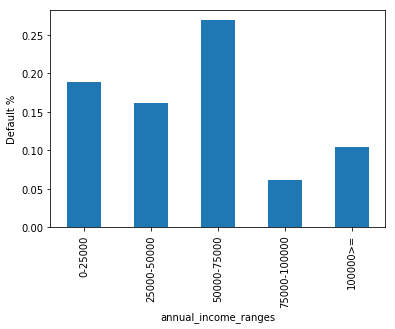

In [96]:
perOfTarget(loan_df, 'annual_income_ranges', 'loan_status')

From the figure, it is clear that people with low income range are tend to pay their loans.

In [97]:
ranges = [0, 5000, 10000, 15000, 20000, 25000,40000]
labels = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000>=']
loan_df['loan_amount_ranges'] = pd.cut(loan_df['loan_amount'], ranges, labels=labels)

loan_amount_ranges
15000-20000    0.477
All            0.142
0-5000         0.137
10000-15000    0.132
5000-10000     0.127
20000-25000    0.118
25000>=        0.108
dtype: float64

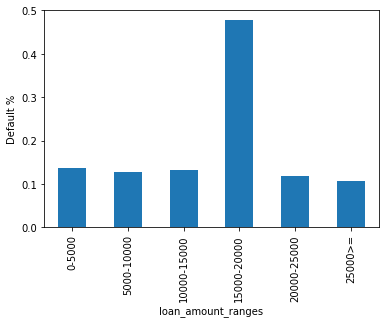

In [98]:
perOfTarget(loan_df, 'loan_amount_ranges', 'loan_status')

From the figure, it is clear that as loan amount increases so as default percentage

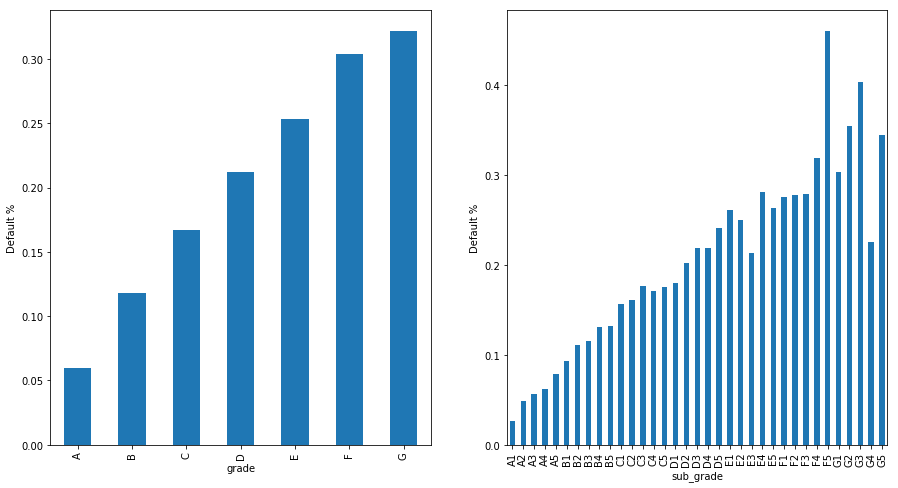

In [99]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
p1=perOfTarget(loan_df, 'grade', 'loan_status')
plt.subplot(1,2,2)
p2=perOfTarget(loan_df, 'sub_grade', 'loan_status')

From the figure, it is clear that as grade increases so as default percentage

**Loan Amount and Home Ownership Distribution**

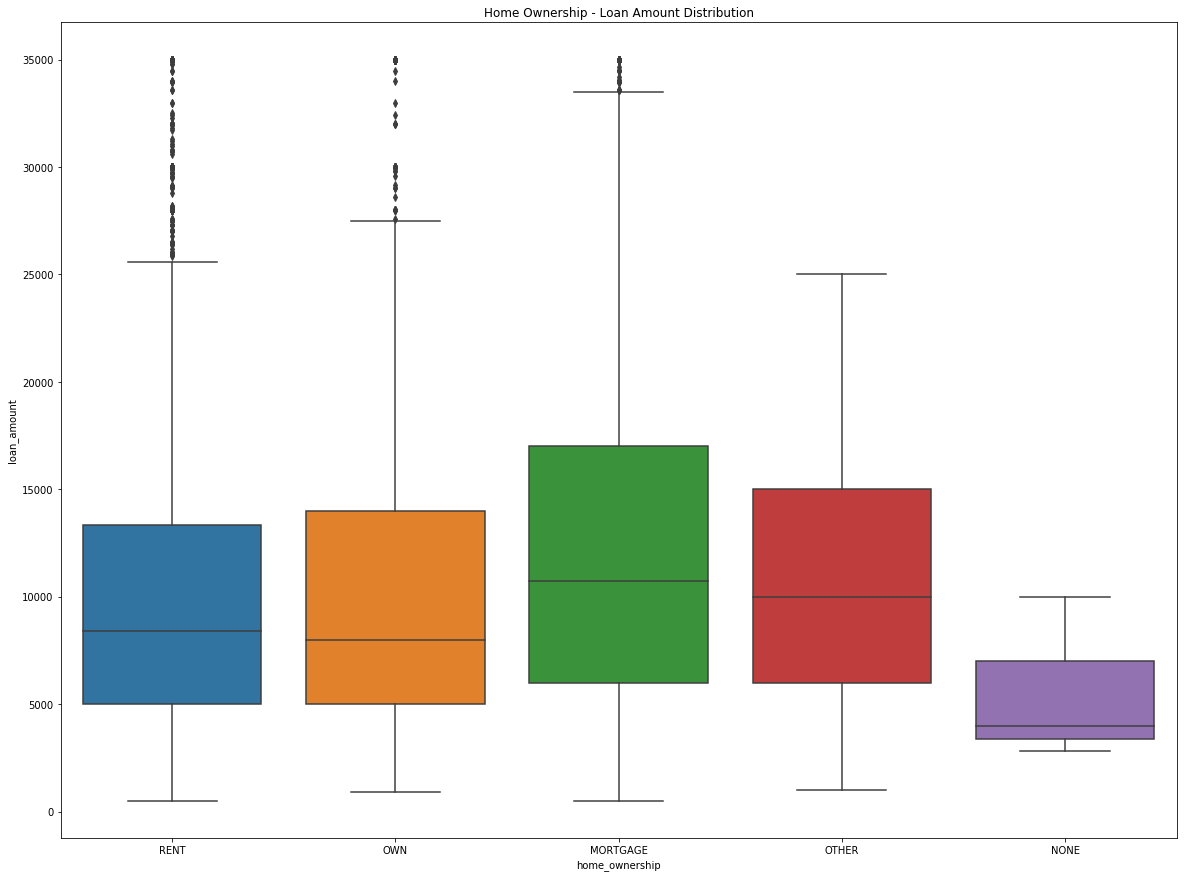

In [100]:
plt.figure(figsize=(20,15))
sns.boxplot(x = 'home_ownership', y = 'loan_amount', data = loan_df)
plt.title("Home Ownership - Loan Amount Distribution")
plt.show()

From the above plot we can observe that loan amount has a highest spread for the mortgage type

**Home Owerneship and Interest Rate Distribution**

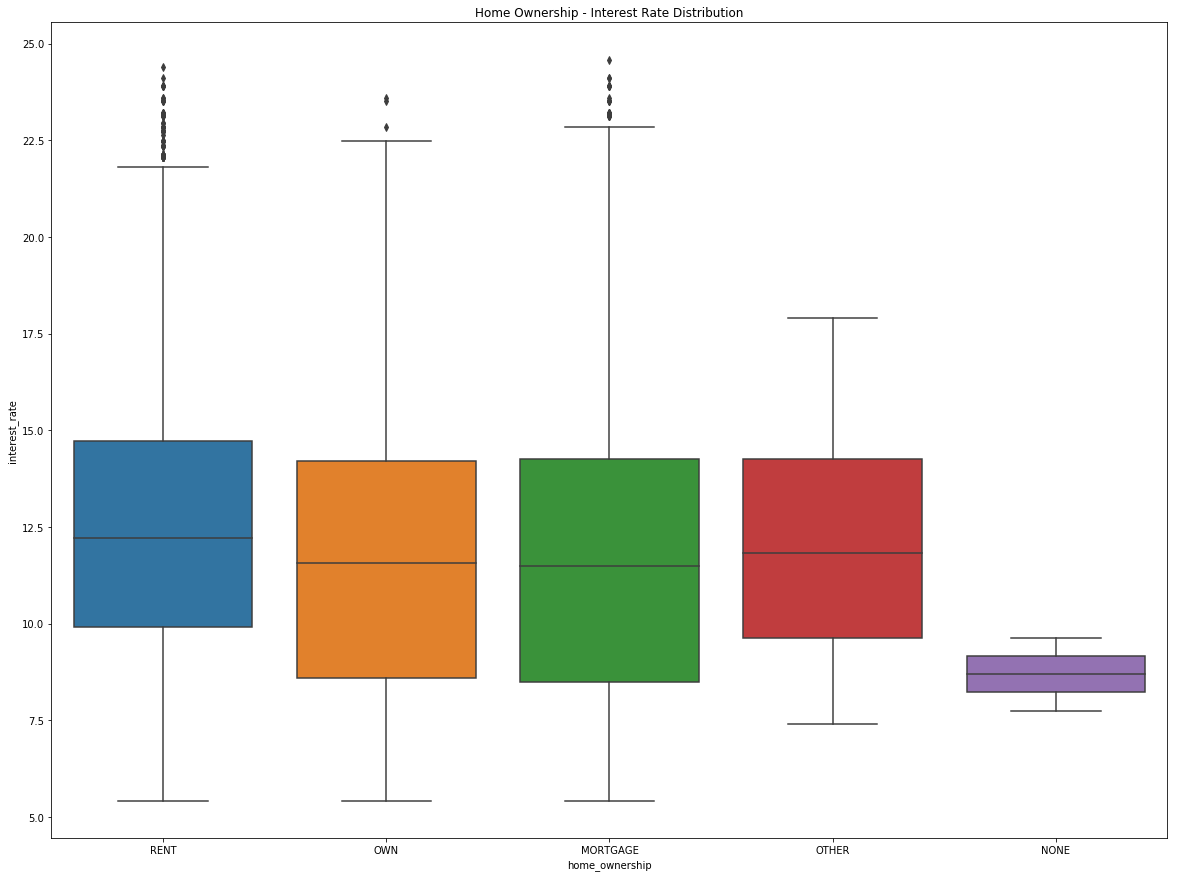

In [101]:
plt.figure(figsize=(20,15))
sns.boxplot(x = 'home_ownership', y = 'interest_rate', data = loan_df)
plt.title("Home Ownership - Interest Rate Distribution")
plt.show()

From the above we can see the highest interest rate of loan is for the rented house

**Doing Analysis on Grades and Sub Grades**

In [102]:
#checking the unique values for grades
loan_df['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

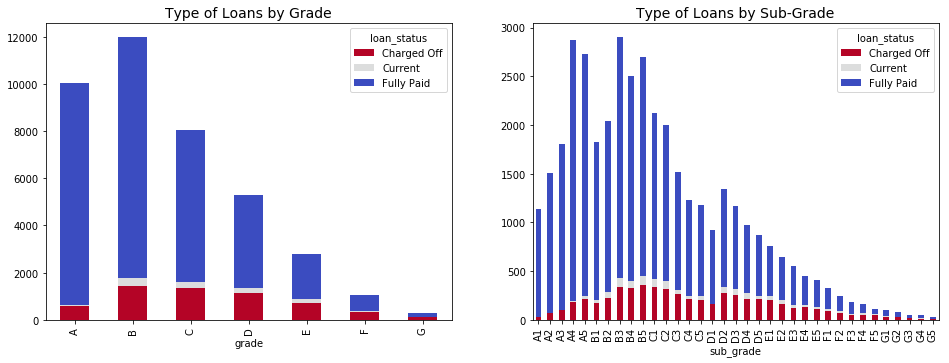

In [103]:
fig = plt.figure(figsize = (16,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

cmap = plt.cm.coolwarm_r

loans_by_grade = loan_df.groupby(['grade', 'loan_status']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Type of Loans by Grade', fontsize=14)

loans_by_sub_grade = loan_df.groupby(['sub_grade', 'loan_status']).size()
loans_by_sub_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
ax2.set_title('Type of Loans by Sub-Grade', fontsize=14)
plt.show()

Most of the charged off loans are in the grades B and C followed by D.

**Grade and Loan Amount Distribution**

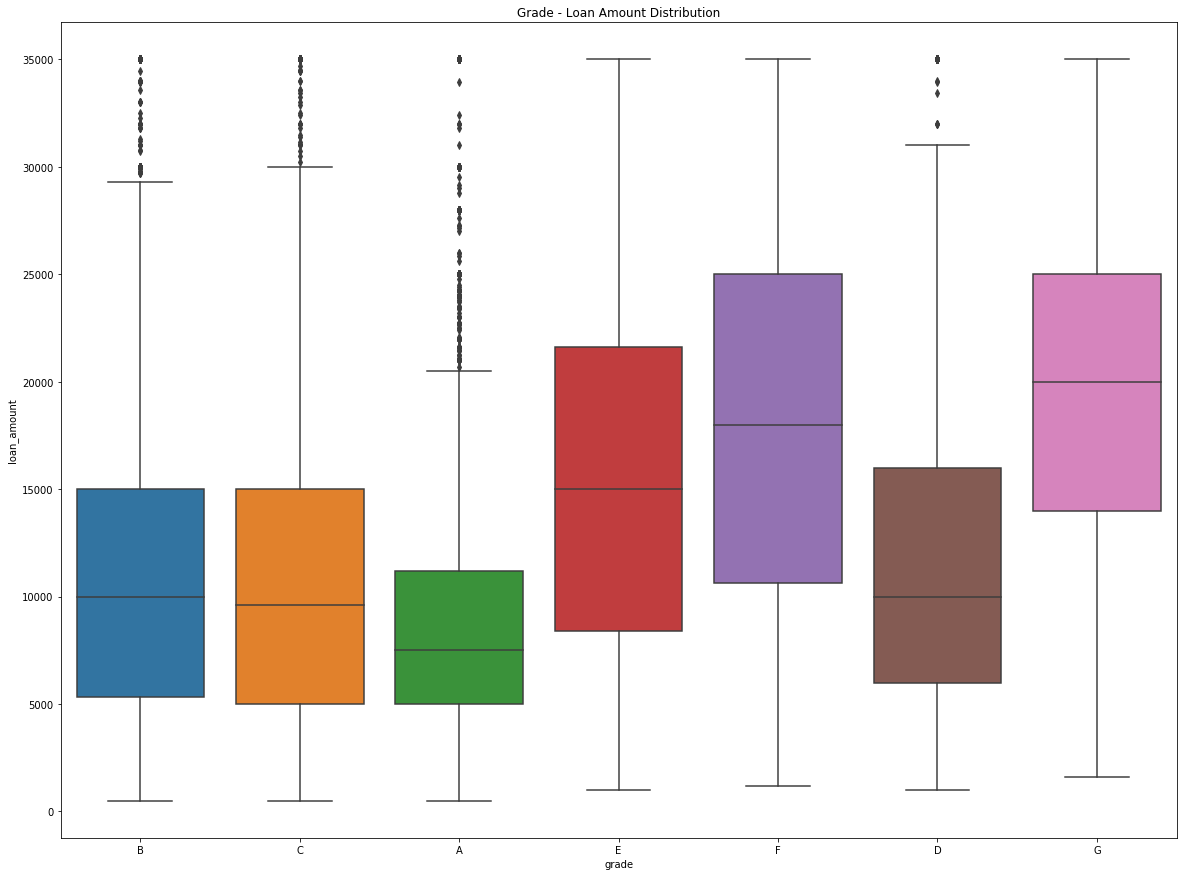

In [104]:
plt.figure(figsize=(20,15))
sns.boxplot(x = 'grade', y = 'loan_amount', data = loan_df)
plt.title("Grade - Loan Amount Distribution")
plt.show()

Grade F followed by Grade E has the highest loan amount spread from the above graph

**Grade and Interest Rate Distribution**

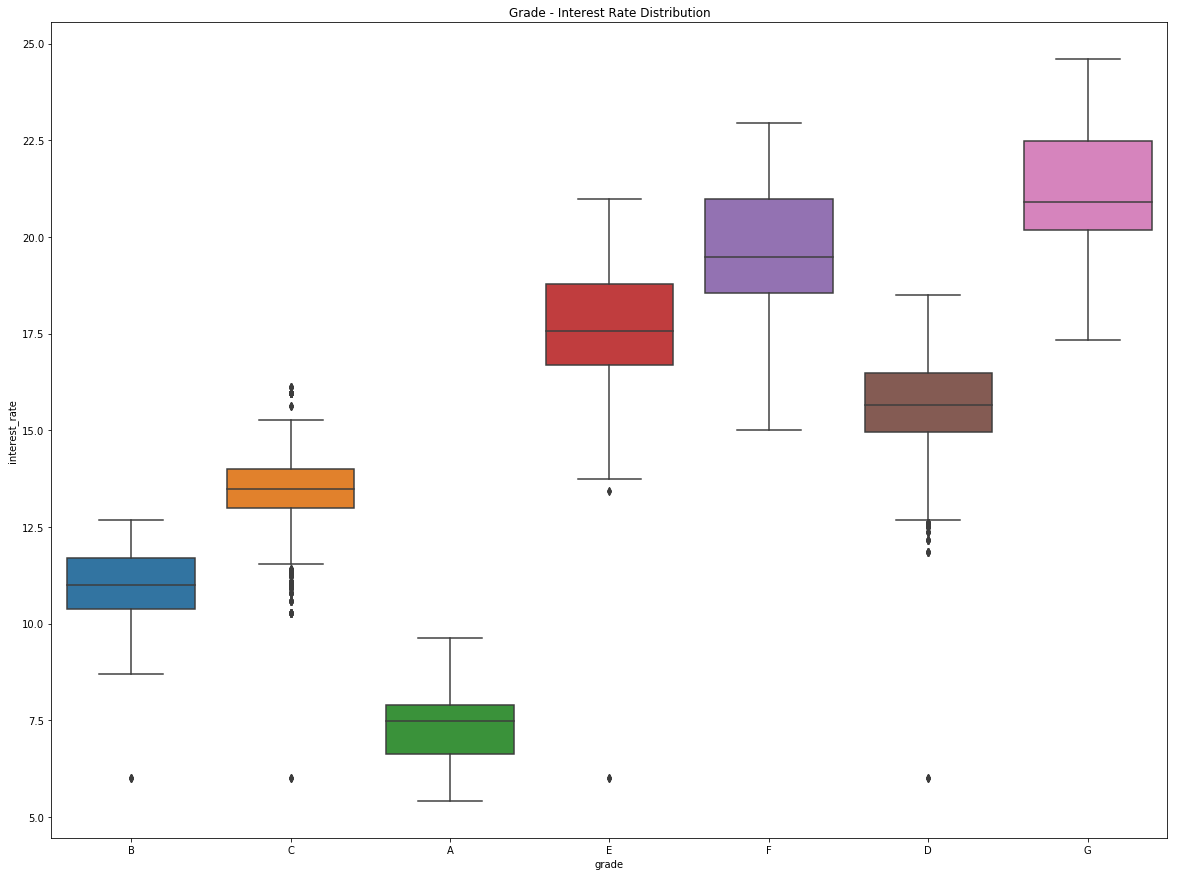

In [105]:
plt.figure(figsize=(20,15))
sns.boxplot(x = 'grade', y = 'interest_rate', data = loan_df)
plt.title("Grade - Interest Rate Distribution")
plt.show()

**Delinq 2 Years**

The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

In [106]:
#unique values in delinq 2 years
loan_df['delinq_2yrs'].unique()

array([ 0,  2,  3,  1,  4,  6,  5,  8,  7,  9, 11], dtype=int64)

In [107]:
#finding how the delinq_2yrs is affecting the loan status
pd.crosstab(loan_df['delinq_2yrs'], loan_df['loan_status'])

loan_status  Charged Off  Current  Fully Paid
delinq_2yrs                                  
0                   4915     1015       29293
1                    505       95        2675
2                    129       14         535
3                     35        8         174
4                     13        2          46
5                      3        1          18
6                      1        0           9
7                      1        0           3
8                      1        0           1
9                      0        0           1
11                     0        0           1

Most of the charged off loans were the number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years is 0, followed by 1

**DTI**

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

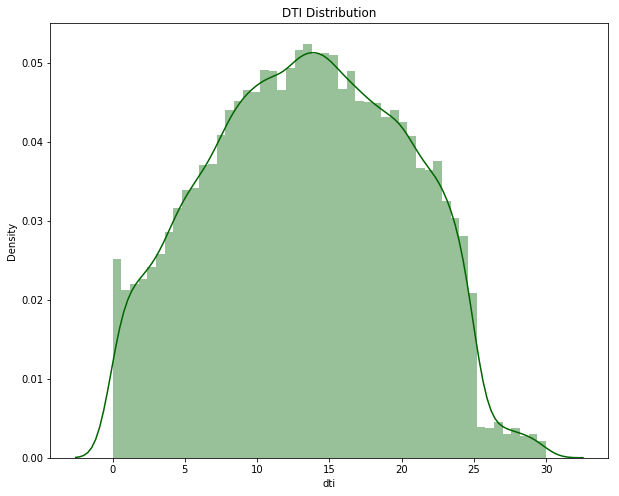

In [108]:
#lets first check the distribution of the DTI
plt.figure(figsize=(10,8))
sns.distplot(loan_df['dti'], color = 'darkgreen')
plt.title('DTI Distribution')
plt.ylabel('Density')
plt.show()

From the above plot we can see that the DTI ratio is high at 15%. Lets now see how this affects the loan status

In [109]:
cm = sns.light_palette("green", as_cmap=True)
round(pd.crosstab(loan_df['loan_status'], loan_df['purpose'], values = loan_df['dti'], aggfunc = 'mean').fillna(0), 2).style.background_gradient(cmap=cm)

From the above we can see that the highest DTI for the charged off loans were taken for the purpose of vacation.

**Credit Utilzation Rate**

In [110]:
cm = sns.light_palette("green", as_cmap=True)
round(pd.crosstab(loan_df['loan_status'], loan_df['purpose'], values = loan_df['revol_util'], aggfunc = 'mean').fillna(0), 2).style.background_gradient(cmap=cm)

From the above we can see that the high credit utilization rate was for credit cards and this also was a major contributor for the charged off loans.

**Employment Length**

Let us see how the employment length affects the interest rate for the applicants

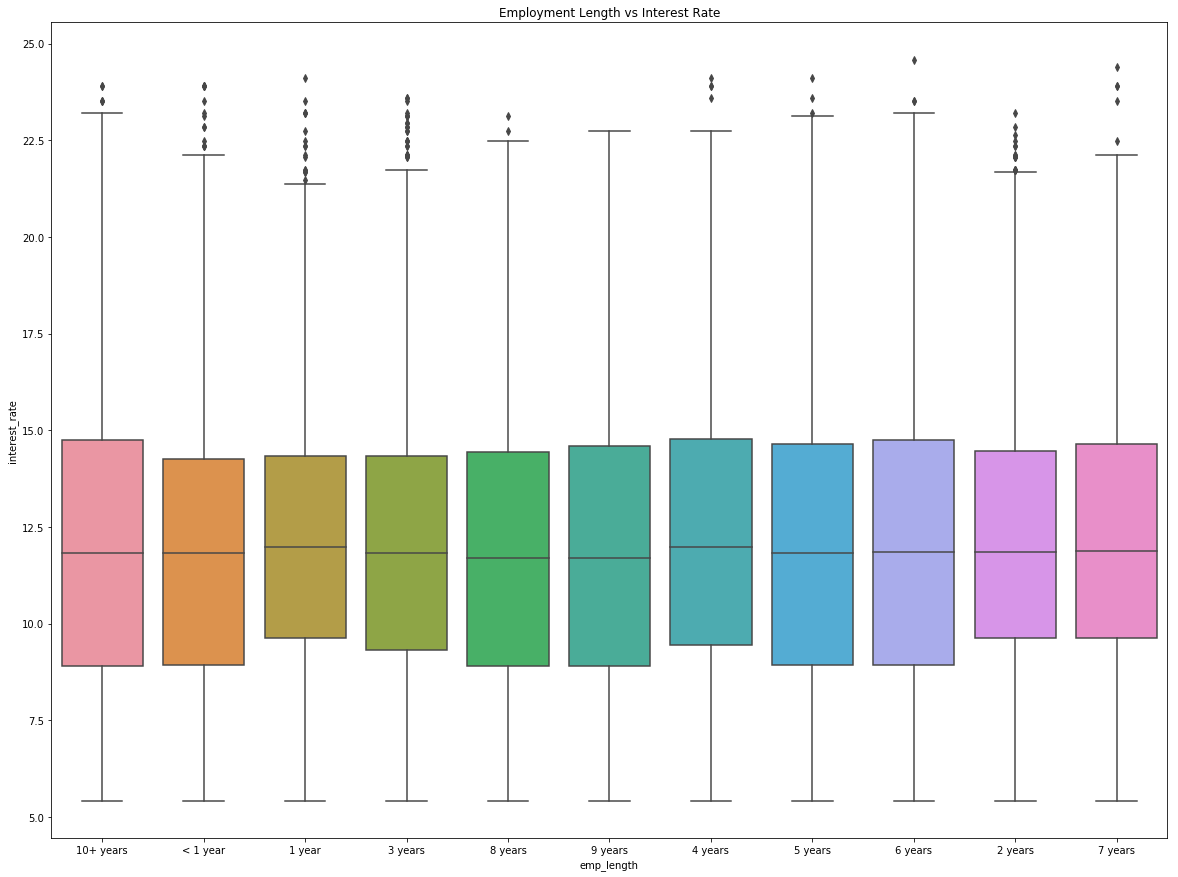

In [111]:
plt.figure(figsize=(20,15))
sns.boxplot(x = 'emp_length', y = 'interest_rate', data = loan_df)
plt.title("Employment Length vs Interest Rate")
plt.show()

From the above we can see that the employment length has very less impact on the interest rate of the loan

Let us remove the loan status of current from our analysis

In [112]:
loan_df = loan_df[loan_df['loan_status'] != 'Current']

In [113]:
#let us do a pairplot for the continous variables
loan1 = loan_df[['loan_amount', 'funded_amount', 'investor_funds', 'term', 'interest_rate','loan_status']]
loan2 = loan_df[['loan_status','annual_income','dti', 'delinq_2yrs', 'revol_bal', 'revol_util' ]]
loan3 = loan_df[['loan_status','total_acc', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp', 'total_rec_int']]

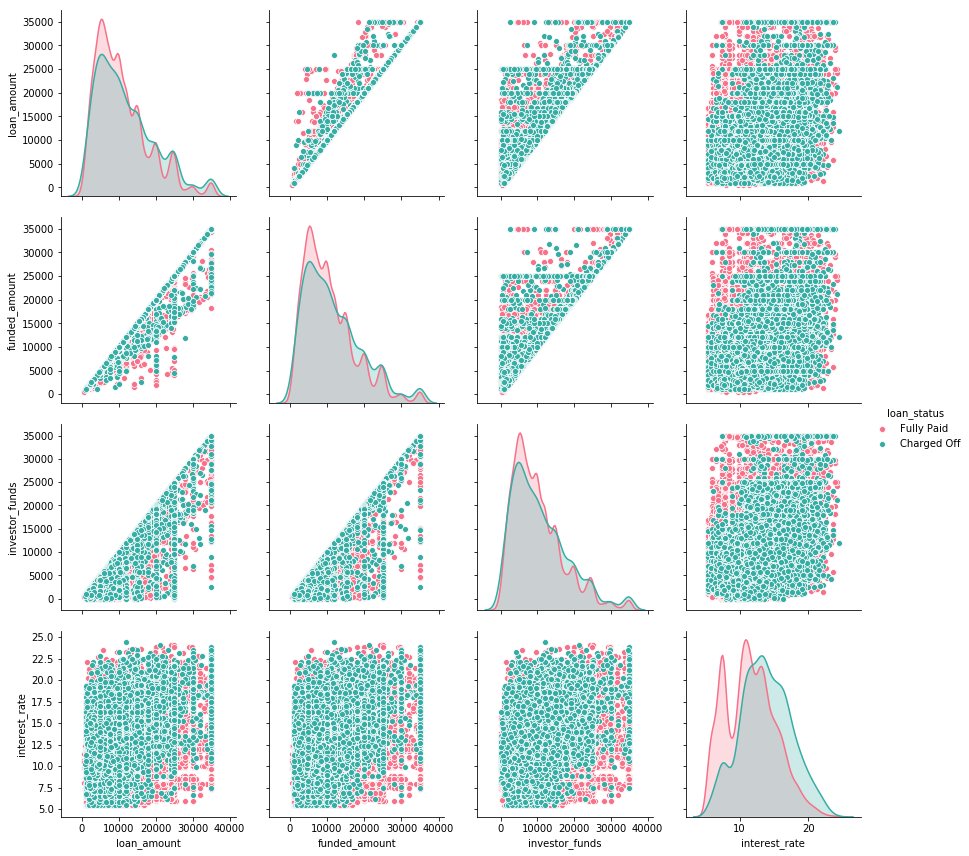

In [114]:
sns.pairplot(loan1, hue = 'loan_status', size = 3, palette="husl")
plt.show()

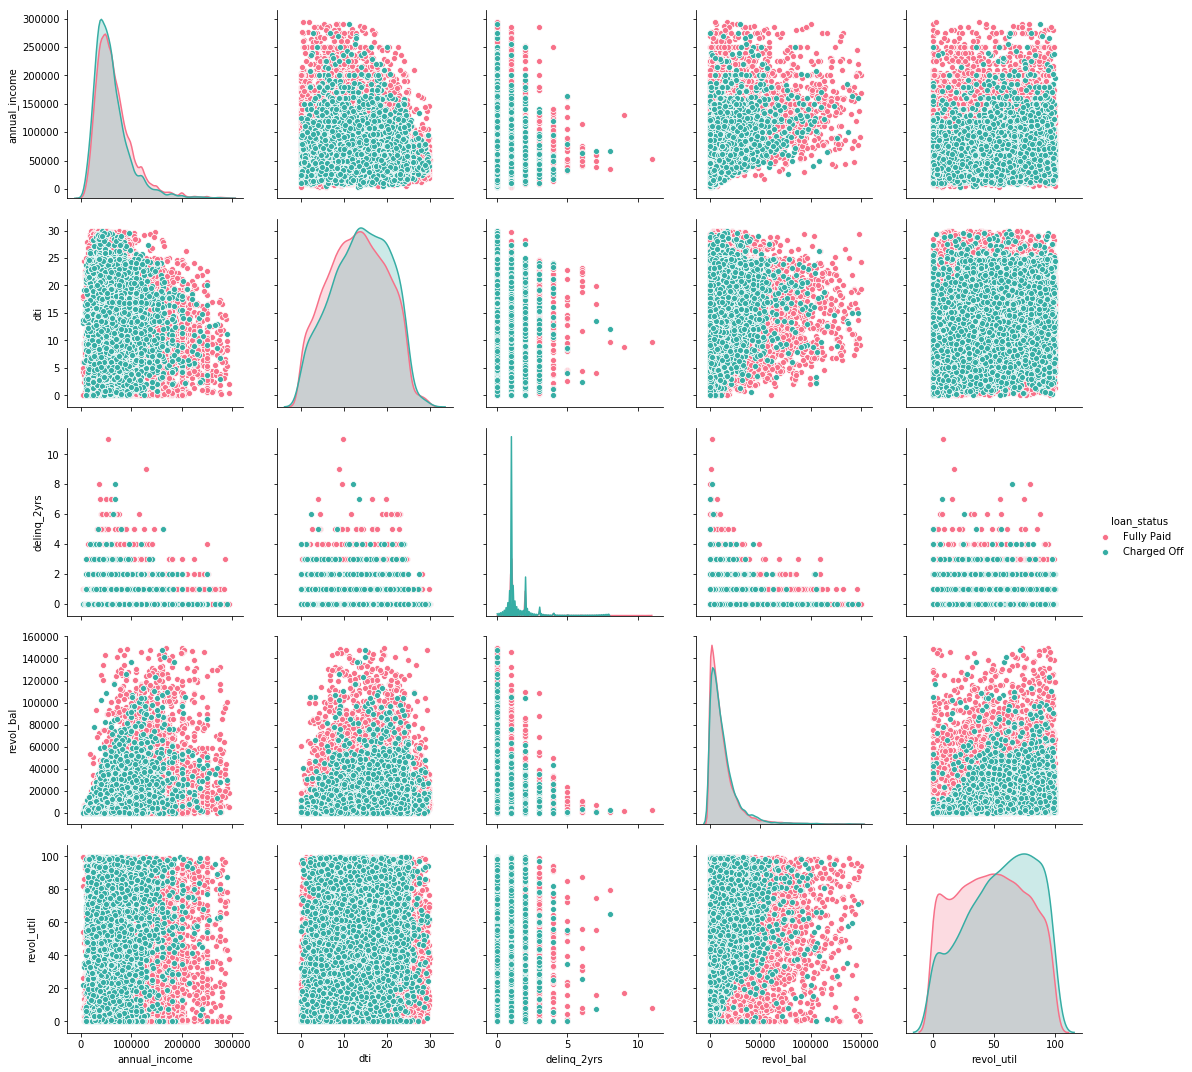

In [115]:
sns.pairplot(loan2, hue = 'loan_status', size = 3, palette="husl")
plt.show()

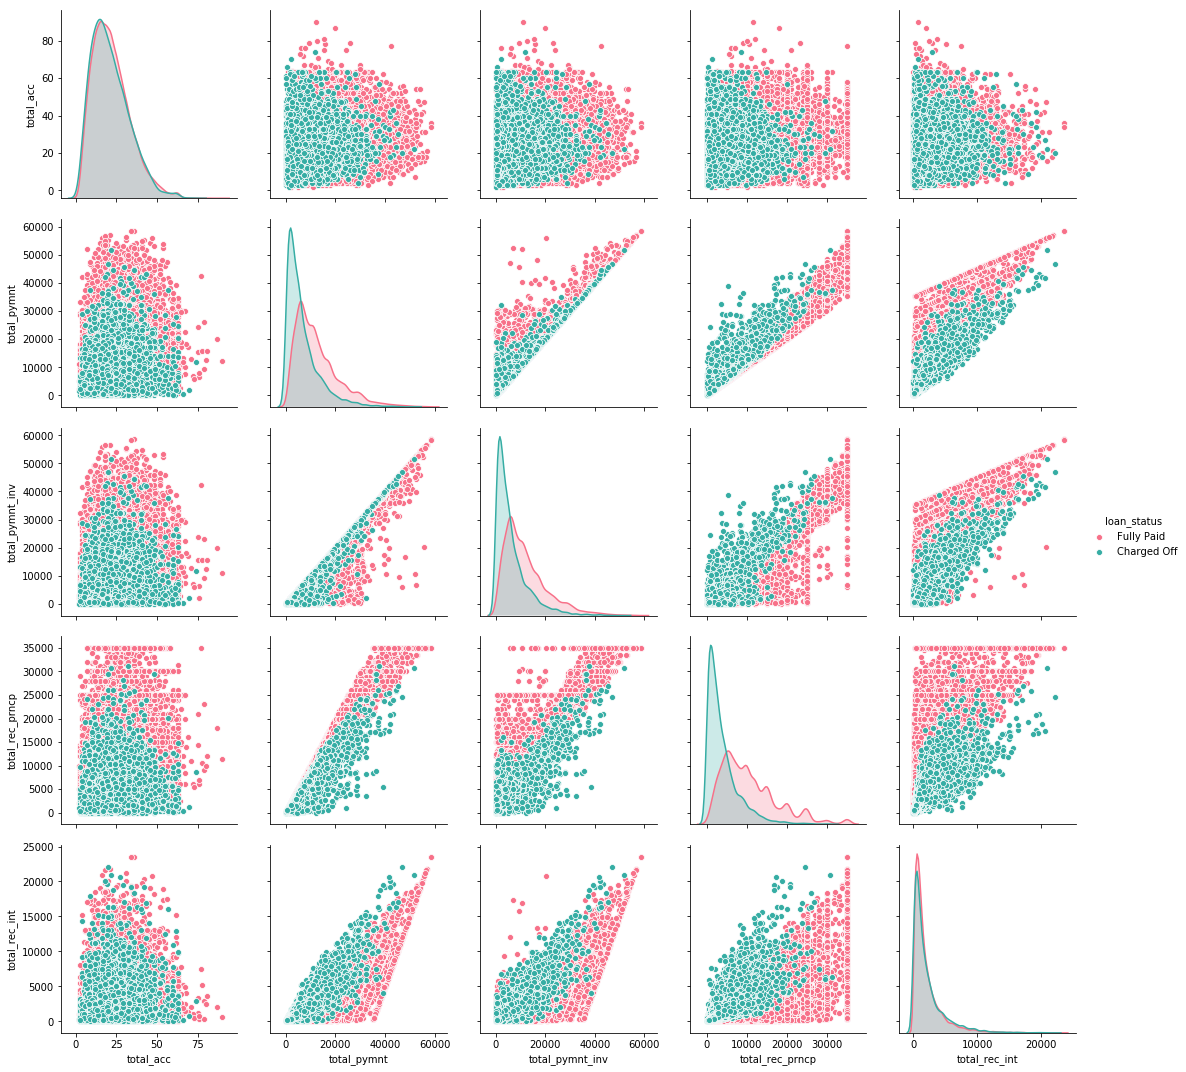

In [116]:
sns.pairplot(loan3, hue = 'loan_status', size = 3, palette="husl")
plt.show()

using one hot encoding for our loan status column

In [117]:
loan_df['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
5         Fully Paid
6         Fully Paid
7         Fully Paid
8        Charged Off
9        Charged Off
10        Fully Paid
11        Fully Paid
12       Charged Off
13        Fully Paid
14       Charged Off
15        Fully Paid
16        Fully Paid
17        Fully Paid
18        Fully Paid
19        Fully Paid
20        Fully Paid
21       Charged Off
22        Fully Paid
23        Fully Paid
24       Charged Off
25        Fully Paid
26       Charged Off
27       Charged Off
28        Fully Paid
29        Fully Paid
30        Fully Paid
            ...     
39687     Fully Paid
39688    Charged Off
39689     Fully Paid
39690     Fully Paid
39691     Fully Paid
39692     Fully Paid
39693     Fully Paid
39694     Fully Paid
39695     Fully Paid
39696     Fully Paid
39697     Fully Paid
39698     Fully Paid
39699     Fully Paid
39700     Fully Paid
39701     Fully Paid
39702     Fully Paid
39703     Ful

In [118]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
loan_df['loan_status'] = le.fit_transform(loan_df['loan_status'])

In [119]:
loan_df.drop(['out_prncp', 'out_prncp_inv'], axis = 1, inplace = True)

Finding the correlation between all the numeric variables

In [120]:
corr = loan_df.corr()
corr

loan_amount  funded_amount  investor_funds  \
loan_amount                 1.000000       0.981854        0.937895   
funded_amount               0.981854       1.000000        0.956080   
investor_funds              0.937895       0.956080        1.000000   
interest_rate               0.299507       0.303627        0.296184   
installment                 0.931987       0.957782        0.905004   
annual_income               0.416429       0.412350        0.394456   
loan_status                -0.060831      -0.057830       -0.039051   
dti                         0.067800       0.067302        0.075425   
delinq_2yrs                -0.034058      -0.033725       -0.039990   
inq_last_6mths              0.010710       0.011002       -0.004300   
open_acc                    0.175407       0.173614        0.160759   
pub_rec                    -0.048926      -0.049462       -0.050471   
revol_bal                   0.310683       0.302867        0.283312   
revol_util                  0.063973       0.067934        0.072501   
total_acc                   0.252473       0.246639        0.238808   
total_pymnt                 0.881120       0.897884        0.873770   
total_pymnt_inv             0.846785       0.863599        0.908368   
total_rec_prncp             0.844511       0.862642        0.837173   
total_rec_int               0.728421       0.736857        0.726449   
total_rec_late_fee          0.047593       0.050059        0.029606   
recoveries                  0.144085       0.144627        0.132029   
collection_recovery_fee     0.077350       0.079021        0.064324   
last_pymnt_amnt             0.474073       0.478007        0.469495   
pub_rec_bankruptcies       -0.034957      -0.035903       -0.040197   
month                       0.052068       0.041910        0.068243   

                         interest_rate  installment  annual_income  \
loan_amount                   0.299507     0.931987       0.416429   
funded_amount                 0.303627     0.957782       0.412350   
investor_funds                0.296184     0.905004       0.394456   
interest_rate                 1.000000     0.276042       0.069421   
installment                   0.276042     1.000000       0.415150   
annual_income                 0.069421     0.415150       1.000000   
loan_status                  -0.212240    -0.028330       0.062746   
dti                           0.113299     0.057401      -0.116764   
delinq_2yrs                   0.157585    -0.022017       0.028622   
inq_last_6mths                0.133580     0.009064       0.038889   
open_acc                      0.003463     0.170807       0.255590   
pub_rec                       0.099634    -0.044419      -0.021693   
revol_bal                     0.090605     0.305230       0.423876   
revol_util                    0.467971     0.094133       0.038546   
total_acc                    -0.050271     0.225484       0.370143   
total_pymnt                   0.288645     0.857575       0.396803   
total_pymnt_inv               0.282975     0.816561       0.381337   
total_rec_prncp               0.172371     0.846323       0.397616   
total_rec_int                 0.520547     0.642516       0.284762   
total_rec_late_fee            0.094783     0.058833       0.013542   
recoveries                    0.129760     0.122412       0.039249   
collection_recovery_fee       0.071396     0.077641       0.024314   
last_pymnt_amnt               0.172086     0.412820       0.224473   
pub_rec_bankruptcies          0.083810    -0.032086      -0.020933   
month                         0.025770     0.029726       0.015199   

                         loan_status       dti  delinq_2yrs  inq_last_6mths  \
loan_amount                -0.060831  0.067800    -0.034058        0.010710   
funded_amount              -0.057830  0.067302    -0.033725        0.011002   
investor_funds             -0.039051  0.075425    -0.039990       -0.004300   
interest_rate              -0.212240  0.1

Viewing the above correlation visually

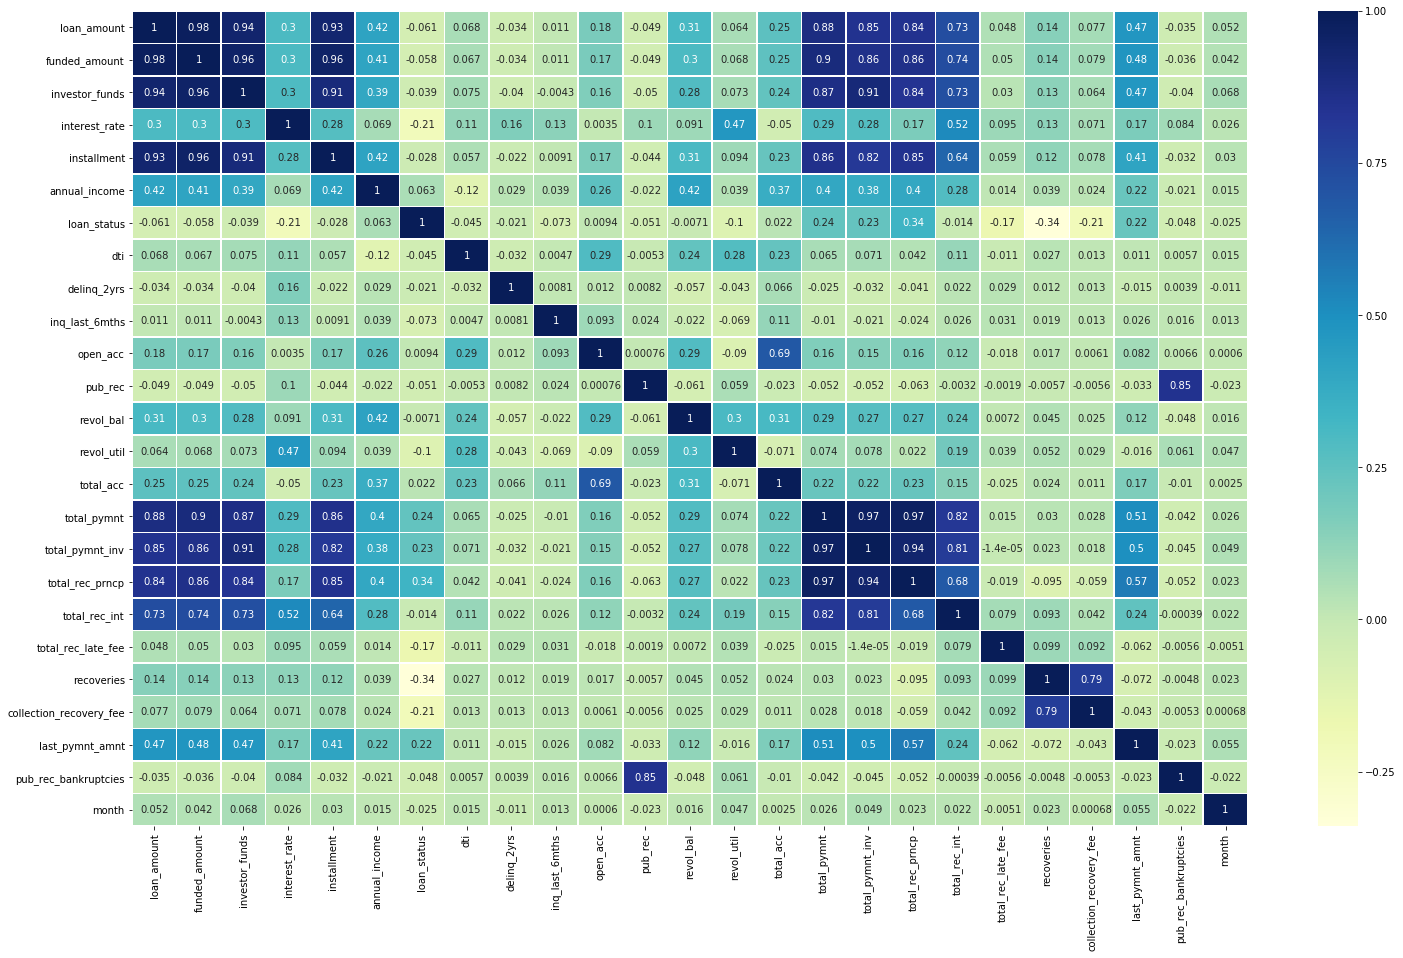

In [121]:
plt.figure(figsize = (25,15))
sns.heatmap(corr, annot = True, linewidths=.5, cmap = "YlGnBu")
plt.show()

From the above correlation plot the following observations can be made for our target variable loan status
1. The loan status has a high negative correlation with the interest rate. We can see that as the interest rate increases, there are chances for applicants to default on the loan.
2. Also the loan status shows a positive correlation with total_rec_prncp. This means that the loan will not be defaulted if the principal amount is being recived on date.
3. The interest rate has a positive correlation with toal_rec_int.
4. The total_rec_int depends highly on the loan amount and the funded amount. 